In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
df=pd.read_csv("promotion_800.csv")
df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,PhD,HR,49,2.86,0
1,46,6,HighSchool,Finance,57,2.37,0
2,32,2,PhD,Finance,30,9.10,0
3,25,22,Master,Marketing,55,7.39,1
4,38,17,Bachelor,IT,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,HighSchool,Sales,30,4.75,0
796,31,19,Bachelor,Sales,52,2.51,0
797,41,35,Master,HR,54,5.27,0
798,19,8,HighSchool,HR,53,1.50,0


In [5]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,3,1,49,2.86,0
1,46,6,1,0,57,2.37,0
2,32,2,3,0,30,9.10,0
3,25,22,2,3,55,7.39,1
4,38,17,0,2,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,1,4,30,4.75,0
796,31,19,0,4,52,2.51,0
797,41,35,2,1,54,5.27,0
798,19,8,1,1,53,1.50,0


In [6]:
x=df.drop('Promotion_Status',axis=1)
y=df['Promotion_Status']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1])

In [10]:
accuracy=accuracy_score(y_test,y_pred)   
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score100.00%


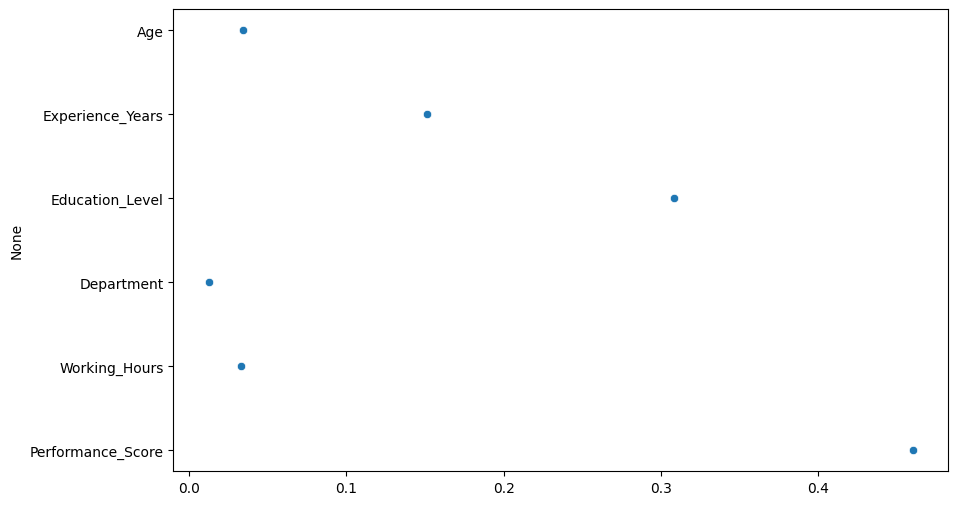

In [11]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.show()